# Analysis Of Seasonal Anime Summer 2024

### Scraping the seasonal anime page of MyAnimeList


In [581]:
import requests
import warnings
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')

url = "https://myanimelist.net/anime/season"

response = requests.get(url)
html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

anime_containers = soup.select('.seasonal-anime')

all_anime_data = []

In [582]:
for anime in anime_containers:

    title_element = anime.select_one('.h2_anime_title a')
    title = title_element.get_text(strip=True) if title_element else 'N/A'

    synopsis_element = anime.select_one('.synopsis .preline')
    synopsis = synopsis_element.get_text(strip=True) if synopsis_element else 'N/A'

    studio_element = anime.select_one('.property:contains("Studio") .item a')
    studio = studio_element.get_text(strip=True) if studio_element else 'N/A'
    
    source_element = anime.select_one('.property:contains("Source") .item')
    source = source_element.get_text(strip=True) if source_element else 'N/A'

    genres_section = anime.select_one('.genres')
    genres = [genre.get_text(strip=True) for genre in genres_section.select('.genre a')] if genres_section else []

    themes_section = anime.find('span', class_='caption', text='Themes')
    themes = []
    if themes_section:
        themes_parent = themes_section.find_parent('div')
        if themes_parent:
            themes = [theme.get_text(strip=True) for theme in themes_parent.find_all('a')]

    demographic_element = anime.select_one('.property:contains("Demographic") .item a')
    demographic = demographic_element.get_text(strip=True) if demographic_element else 'N/A'

    score_element = anime.select_one('.score-label')
    score = score_element.get_text(strip=True) if score_element else 'N/A'
    
    members_element = anime.select_one('.member')
    members = members_element.get_text(strip=True) if members_element else 'N/A'

    start_date_element = anime.select_one('.js-start_date')
    start_date = start_date_element.get_text(strip=True) if start_date_element else 'N/A'

    anime_data = {
        'Title': title,
        'Synopsis': synopsis,
        'Studio': studio,
        'Source': source,
        'Genres': ", ".join(genres),
        'Themes': ", ".join(themes),
        'Demographic': demographic,
        'Score': score,
        'Members': members,
        'Start Date': start_date,
    }

    all_anime_data.append(anime_data)

In [583]:
import csv

csv_file = 'anime_seasonal_data.csv' # Writing the collected data into a CSV file


with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=all_anime_data[0].keys())
    writer.writeheader()
    writer.writerows(all_anime_data)


In [660]:
import pandas as pd

df = pd.read_csv('anime_seasonal_data.csv') # Coverting the CSV filr to DataFrame for analysis
df

,Title,Synopsis,Studio,Source,Genres,Themes,Demographic,Score,Members,Start Date
0,"""Oshi no Ko"" 2nd Season",Aqua's desire for revenge takes center stage a...,Doga Kobo,Manga,"Drama, Supernatural","Reincarnation, Showbiz",Seinen,8.37,281K,20240703
1,Tokidoki Bosotto Russia-go de Dereru Tonari no...,"Smart, refined, and strikingly gorgeous, half-...",Doga Kobo,Light novel,"Comedy, Romance",NaN,NaN,8.11,214K,20240703
2,Kami no Tou: Ouji no Kikan,Ja Wangnan can’t seem to pass the 20th floor. ...,The Answer Studio,Web manga,"Action, Adventure, Drama, Fantasy, Mystery",NaN,NaN,7.50,167K,20240707
3,Shikanoko Nokonoko Koshitantan,No one knows Torako used to be a delinquent. A...,Wit Studio,Manga,Comedy,"Gag Humor, School",Shounen,7.70,149K,20240707
4,Fairy Tail: 100-nen Quest,The 100 Years Quest: a mission so challenging ...,J.C.Staff,Web manga,"Action, Adventure, Fantasy",NaN,Shounen,8.11,120K,20240707
...,...,...,...,...,...,...,...,...,...,...
177,San Shaonu,(No synopsis yet.),NaN,Original,"Adventure, Fantasy",NaN,NaN,NaN,241,20240706
178,Xi Yangyang Yu Hui Tailang Zhi Shouhu,(No synopsis yet.),NaN,Original,"Action, Comedy",NaN,Kids,NaN,66,20240719
179,Sinbi Apartment: Bulgeunnunui Sasin,Recap of the plot of Sinbi's Apartment: Phanto...,NaN,Original,"Fantasy, Supernatural",NaN,Kids,NaN,54,20240814
180,Kinnikuman: Kanpeki Chоujin Shiso-hen Episode 0,Episode 0 of Kinnikuman: Kanpeki Chоujin Shiso...,Production I.G,Manga,"Comedy, Sports",NaN,Shounen,6.51,1.5K,20240707


In [594]:
df.shape

(182, 10)

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        182 non-null    object        
 1   Synopsis     182 non-null    object        
 2   Studio       137 non-null    object        
 3   Source       179 non-null    object        
 4   Genres       172 non-null    object        
 5   Themes       42 non-null     object        
 6   Demographic  63 non-null     object        
 7   Score        87 non-null     float64       
 8   Members      182 non-null    object        
 9   Start Date   182 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 14.3+ KB


In [596]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y%m%d')
df

,Title,Synopsis,Studio,Source,Genres,Themes,Demographic,Score,Members,Start Date
0,"""Oshi no Ko"" 2nd Season",Aqua's desire for revenge takes center stage a...,Doga Kobo,Manga,"Drama, Supernatural","Reincarnation, Showbiz",Seinen,8.37,281K,2024-07-03
1,Tokidoki Bosotto Russia-go de Dereru Tonari no...,"Smart, refined, and strikingly gorgeous, half-...",Doga Kobo,Light novel,"Comedy, Romance",NaN,NaN,8.11,214K,2024-07-03
2,Kami no Tou: Ouji no Kikan,Ja Wangnan can’t seem to pass the 20th floor. ...,The Answer Studio,Web manga,"Action, Adventure, Drama, Fantasy, Mystery",NaN,NaN,7.50,167K,2024-07-07
3,Shikanoko Nokonoko Koshitantan,No one knows Torako used to be a delinquent. A...,Wit Studio,Manga,Comedy,"Gag Humor, School",Shounen,7.70,149K,2024-07-07
4,Fairy Tail: 100-nen Quest,The 100 Years Quest: a mission so challenging ...,J.C.Staff,Web manga,"Action, Adventure, Fantasy",NaN,Shounen,8.11,120K,2024-07-07
...,...,...,...,...,...,...,...,...,...,...
177,San Shaonu,(No synopsis yet.),NaN,Original,"Adventure, Fantasy",NaN,NaN,NaN,241,2024-07-06
178,Xi Yangyang Yu Hui Tailang Zhi Shouhu,(No synopsis yet.),NaN,Original,"Action, Comedy",NaN,Kids,NaN,66,2024-07-19
179,Sinbi Apartment: Bulgeunnunui Sasin,Recap of the plot of Sinbi's Apartment: Phanto...,NaN,Original,"Fantasy, Supernatural",NaN,Kids,NaN,54,2024-08-14
180,Kinnikuman: Kanpeki Chоujin Shiso-hen Episode 0,Episode 0 of Kinnikuman: Kanpeki Chоujin Shiso...,Production I.G,Manga,"Comedy, Sports",NaN,Shounen,6.51,1.5K,2024-07-07


In [597]:
df.isnull().sum()

Title            0
Synopsis         0
Studio          45
Source           3
Genres          10
Themes         140
Demographic    119
Score           95
Members          0
Start Date       0
dtype: int64

In [598]:
df['Score'].describe()

count    87.000000
mean      6.943448
std       0.797608
min       4.980000
25%       6.370000
50%       7.030000
75%       7.410000
max       8.970000
Name: Score, dtype: float64

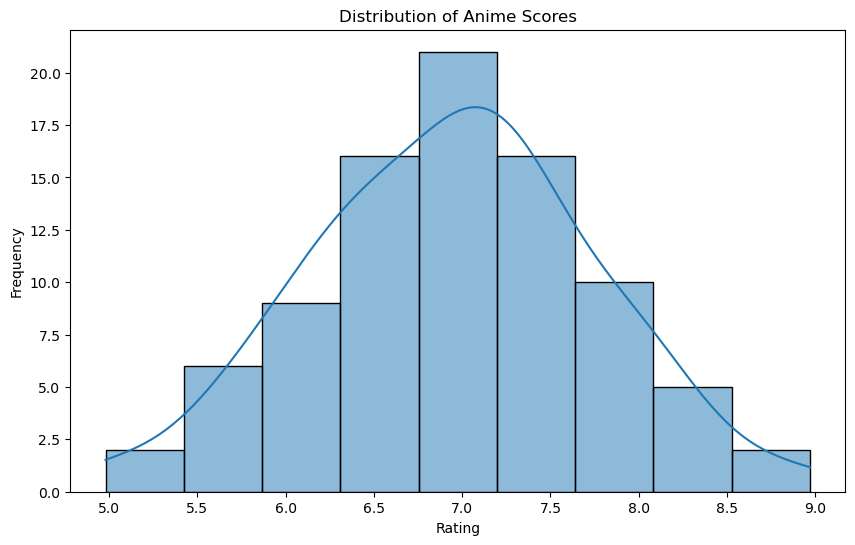

In [599]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde = True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [600]:
genre_series = df['Genres'].str.split(',', expand=True).stack()
genre_series = genre_series.str.strip()
genre_series.unique()

array(['Drama', 'Supernatural', 'Comedy', 'Romance', 'Action',
       'Adventure', 'Fantasy', 'Mystery', 'Slice of Life', 'Ecchi',
       'Sci-Fi', 'Boys Love', 'Sports', 'Suspense', 'Avant Garde',
       'Horror', 'Girls Love', 'Gourmet', 'Award Winning', 'Hentai'],
      dtype=object)

In [601]:
genre_series.value_counts()

Fantasy          62
Comedy           61
Action           60
Adventure        41
Sci-Fi           17
Romance          17
Drama            16
Slice of Life    13
Hentai           10
Mystery           8
Supernatural      8
Suspense          7
Sports            6
Ecchi             4
Horror            3
Boys Love         2
Avant Garde       1
Girls Love        1
Gourmet           1
Award Winning     1
Name: count, dtype: int64

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns

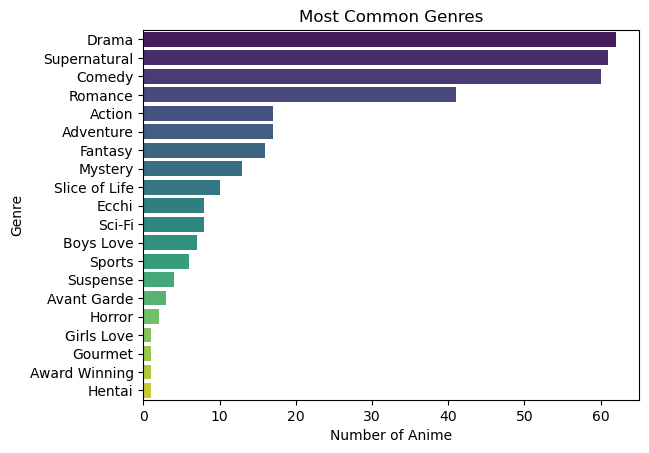

In [603]:
sns.barplot(y=genre_series.unique(), x=genre_series.value_counts(), palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Number of Anime')
plt.ylabel('Genre')
plt.show()

In [604]:
theme_series = df['Themes'].str.split(',', expand=True).stack()
theme_series = theme_series.str.strip()
theme_series.unique()

array(['Reincarnation', 'Showbiz', 'Gag Humor', 'School', 'Adult Cast',
       'Isekai', 'Parody', 'Romantic Subtext', 'Historical', 'Samurai',
       'Harem', 'Otaku Culture', 'Crossdressing', 'Love Polygon',
       'Childcare', 'Vampire', 'High Stakes Game', 'Psychological',
       'Mythology', 'Anthropomorphic', 'Workplace', 'Mecha', 'Racing',
       'Super Power', 'Organized Crime', 'Idols (Female)', 'Music',
       'Space', 'Military', 'Martial Arts', 'Time Travel', 'Idols (Male)'],
      dtype=object)

In [605]:
theme_series.value_counts()

Historical          11
School              10
Isekai               7
Martial Arts         6
Reincarnation        5
Adult Cast           5
Music                5
Mythology            4
Super Power          3
Mecha                3
Anthropomorphic      3
Psychological        2
Military             2
Space                2
Idols (Female)       2
Idols (Male)         2
Childcare            2
Love Polygon         2
Harem                2
Samurai              2
Gag Humor            2
Showbiz              1
Vampire              1
Workplace            1
Crossdressing        1
Racing               1
Otaku Culture        1
Organized Crime      1
Romantic Subtext     1
Parody               1
Time Travel          1
High Stakes Game     1
Name: count, dtype: int64

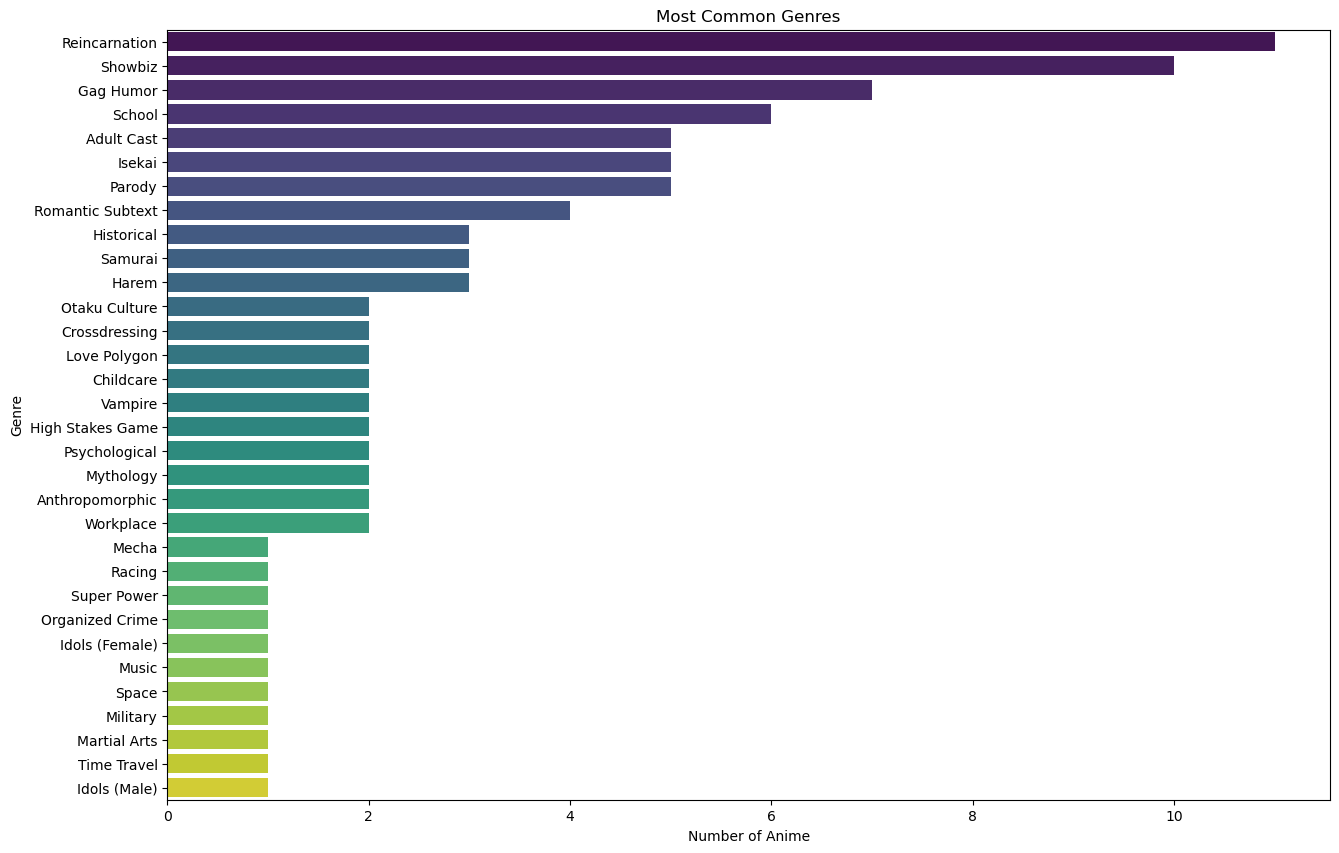

In [606]:
plt.figure(figsize=(15,10))
sns.barplot(y=theme_series.unique(), x=theme_series.value_counts(), palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Number of Anime')
plt.ylabel('Genre')
plt.show()

In [607]:
df['Source'].value_counts()

Source
Original        51
Manga           46
Web manga       18
Light novel     17
Other           11
Game             9
Web novel        8
Novel            6
Card game        3
Picture book     3
Visual novel     2
4-koma manga     2
Book             2
Mixed media      1
Name: count, dtype: int64

In [608]:
df['Studio'].value_counts().head(10)

Studio
OLM                    6
Toei Animation         5
Production I.G         5
P.A. Works             4
Bones                  4
Shin-Ei Animation      3
Sunrise                3
Nice Boat Animation    3
Tezuka Productions     3
Doga Kobo              3
Name: count, dtype: int64

In [610]:
df['Score'].sort_values(ascending = False).head(10)
top_anime = df.sort_values(by='Score', ascending=False).head(10)

print("Top 10 Anime Of The Season:\n")
for index, row in top_anime.iterrows():
    print(f"Title: {row['Title']}")
    print(f"Genres: {row['Genres']}")
    print(f"Score: {row['Score']}")
    print(f"Members: {row['Members']}")
    print(f"Demographic: {row['Demographic']}")
    print(f"Synopis: {row['Synopsis']}")
    print('-' * 40)

Top 10 Anime Of The Season:

Title: Monogatari Series: Off & Monster Season
Genres: Comedy, Mystery, Supernatural
Score: 8.97
Members: 54K
Demographic: nan
Synopis: After graduating from high school, the story of Koyomi Araragi came to an end. This time, it truly ended. However, the story of the girls who were saved by Araragi was not over. It is a prequel, or perhaps a sequel to their struggles in youth.

(Source: MAL News)
----------------------------------------
Title: One Piece
Genres: Action, Adventure, Fantasy
Score: 8.72
Members: 2.4M
Demographic: Shounen
Synopis: Barely surviving in a barrel after passing through a terrible whirlpool at sea, carefree Monkey D. Luffy ends up aboard a ship under attack by fearsome pirates. Despite being a naive-looking teenager, he is not to be underestimated. Unmatched in battle, Luffy is a pirate himself who resolutely pursues the coveted One Piece treasure and the King of the Pirates title that comes with it.

The late King of the Pirates, Gol

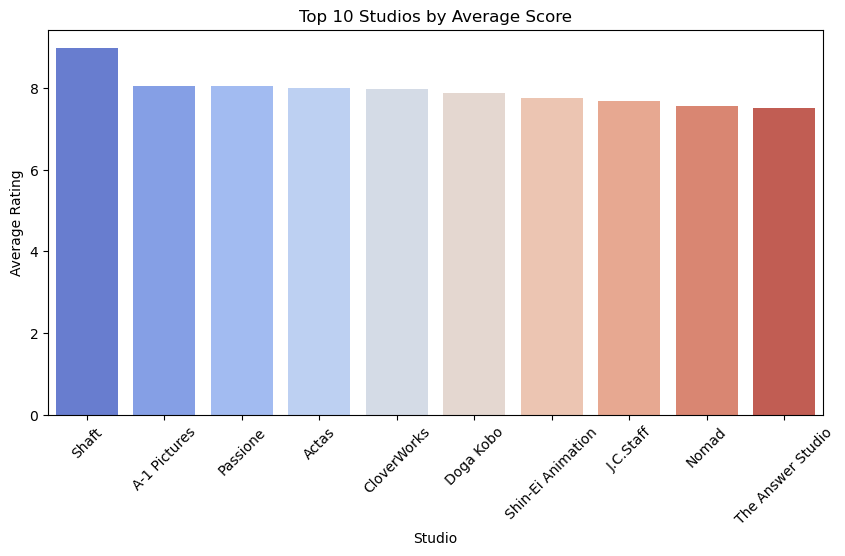

In [611]:
average_rating_by_studio = df.groupby('Studio')['Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=average_rating_by_studio.index, y=average_rating_by_studio.values, palette='coolwarm')
plt.title('Top 10 Studios by Average Score')
plt.xlabel('Studio')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

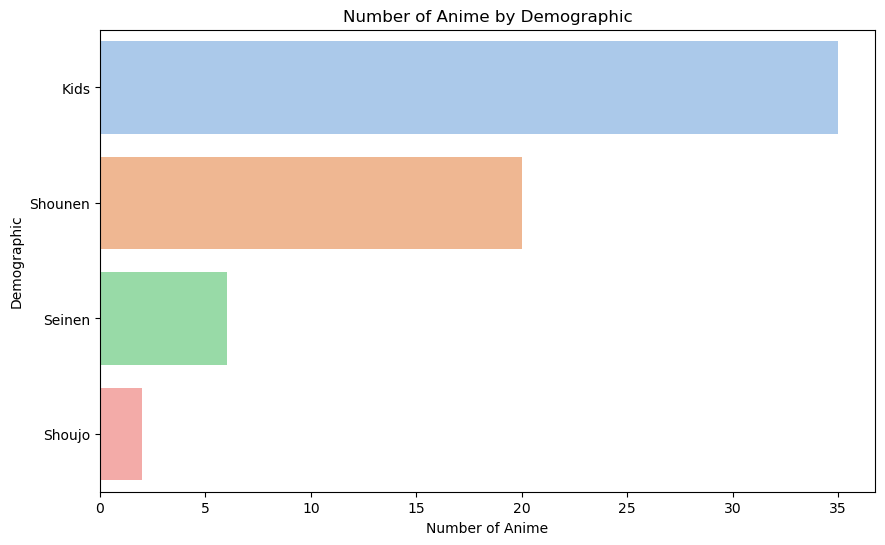

In [612]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Demographic', order=df['Demographic'].value_counts().index, palette='pastel')
plt.title('Number of Anime by Demographic')
plt.xlabel('Number of Anime')
plt.ylabel('Demographic')
plt.show()

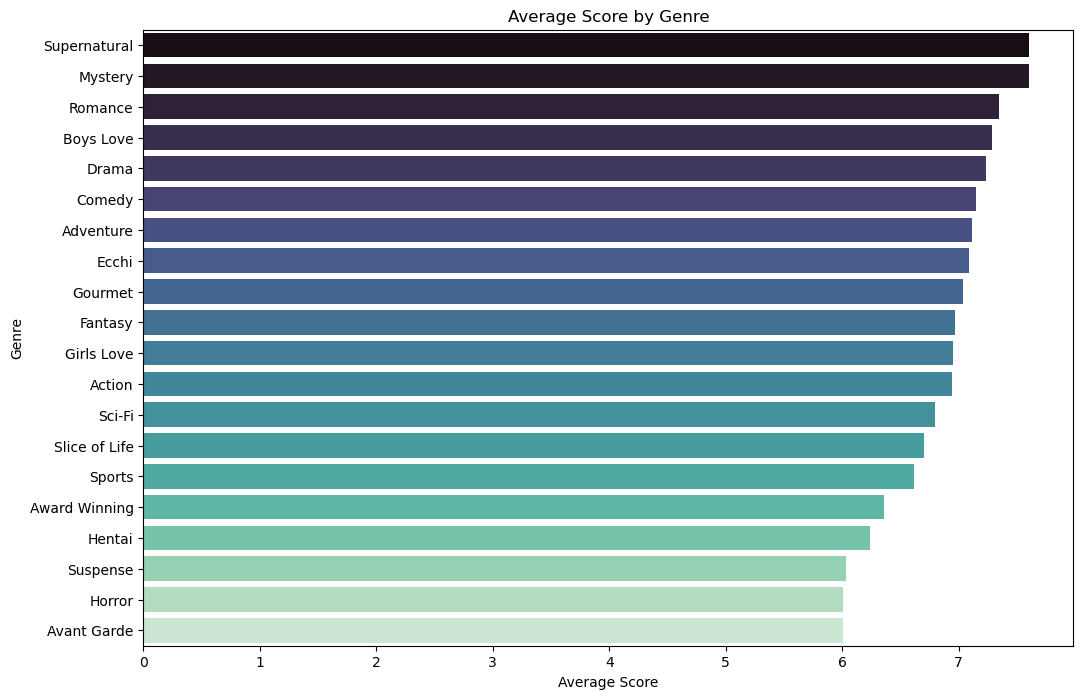

In [613]:
df['Genres'] = df['Genres'].str.split(', ')
exploded_genres = df.explode('Genres')

average_rating_by_genre = exploded_genres.groupby('Genres')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y=average_rating_by_genre.index, x=average_rating_by_genre.values, palette='mako')
plt.title('Average Score by Genre')
plt.xlabel('Average Score')
plt.ylabel('Genre')
plt.show()

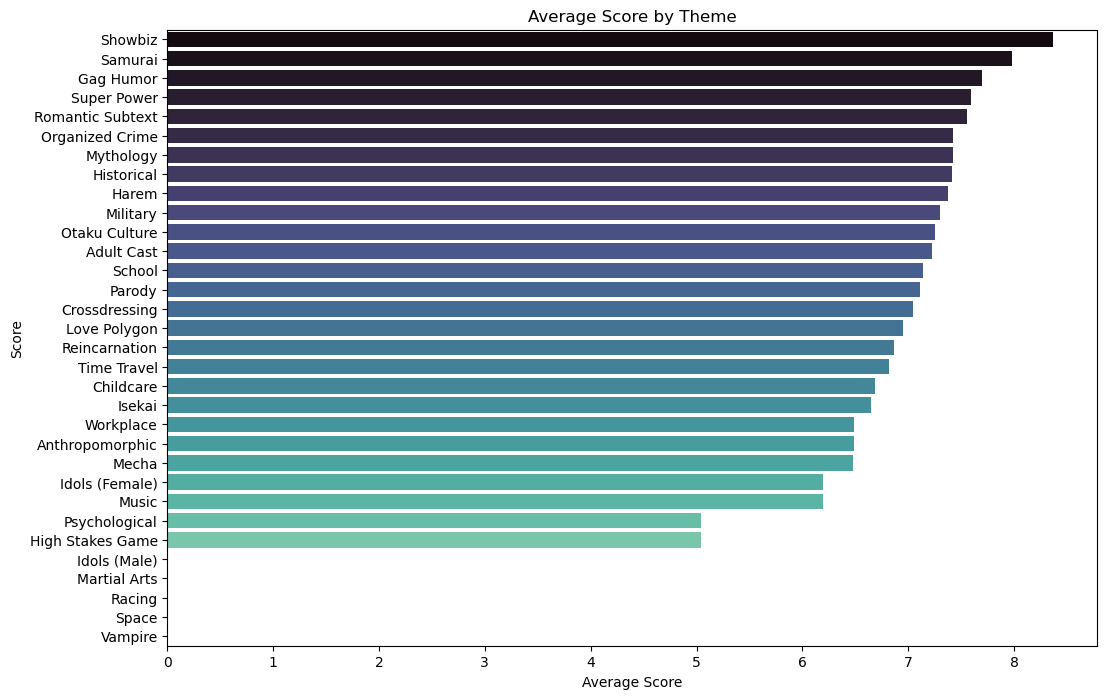

In [614]:
df['Themes'] = df['Themes'].str.split(', ')
exploded_genres = df.explode('Themes')

average_rating_by_genre = exploded_genres.groupby('Themes')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y=average_rating_by_genre.index, x=average_rating_by_genre.values, palette='mako')
plt.title('Average Score by Theme')
plt.xlabel('Average Score')
plt.ylabel('Score')
plt.show()

In [615]:
df['Broadcast Day'] = df['Start Date'].dt.day_name()
df['Broadcast Day']

0      Wednesday
1      Wednesday
2         Sunday
3         Sunday
4         Sunday
         ...    
177     Saturday
178       Friday
179    Wednesday
180       Sunday
181       Sunday
Name: Broadcast Day, Length: 182, dtype: object

In [616]:
print(df['Broadcast Day'].value_counts().sort_index())

Broadcast Day
Friday       49
Monday       23
Saturday     34
Sunday       37
Thursday     11
Tuesday      11
Wednesday    17
Name: count, dtype: int64


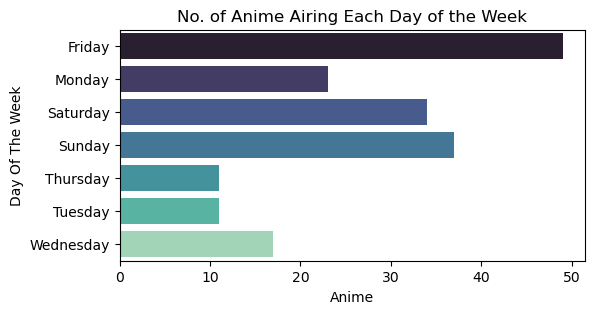

In [617]:
plt.figure(figsize=(6, 3))
sns.barplot(y= df['Broadcast Day'].sort_values().unique(),x=df['Broadcast Day'].value_counts().sort_index(), palette='mako')
plt.title('No. of Anime Airing Each Day of the Week')
plt.xlabel('Anime')
plt.ylabel('Day Of The Week')
plt.show()

In [618]:
def convert_to_int(x):
    if 'K' in x:
        return int(float(x.replace('K', '').replace(',', '')) * 1000)
    elif 'M' in x:
        return int(float(x.replace('M', '').replace(',', '')) * 1000000)
    else:
        return int(x.replace(',', ''))
df['Members'] = df['Members'].apply(convert_to_int)

In [619]:
df.groupby('Broadcast Day')['Members'].sum().sort_values(ascending=False)

Broadcast Day
Wednesday    3093050
Friday       1093596
Sunday       1092235
Saturday      765929
Monday        539130
Tuesday       437878
Thursday      240118
Name: Members, dtype: int64

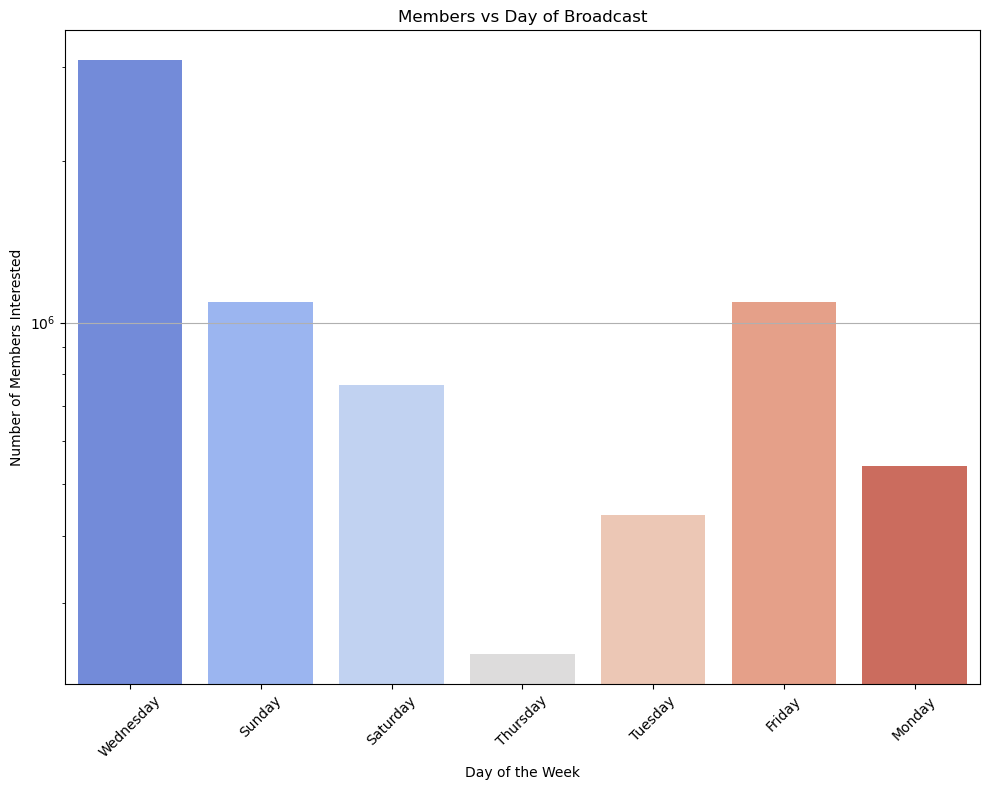

In [620]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Broadcast Day', y='Members', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Members vs Day of Broadcast')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Members Interested')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Total Number of Members by Genre:
Genres
Fantasy          4437770
Action           4400856
Adventure        4360140
Comedy           2030627
Romance           972127
Drama             935115
Mystery           669453
Supernatural      391090
Sci-Fi            282466
Ecchi             231000
Slice of Life     186610
Suspense           91521
Girls Love         77000
Boys Love          40100
Sports             33655
Horror             28194
Gourmet            13000
Hentai              7324
Award Winning       2100
Avant Garde         2100
Name: Members, dtype: int64


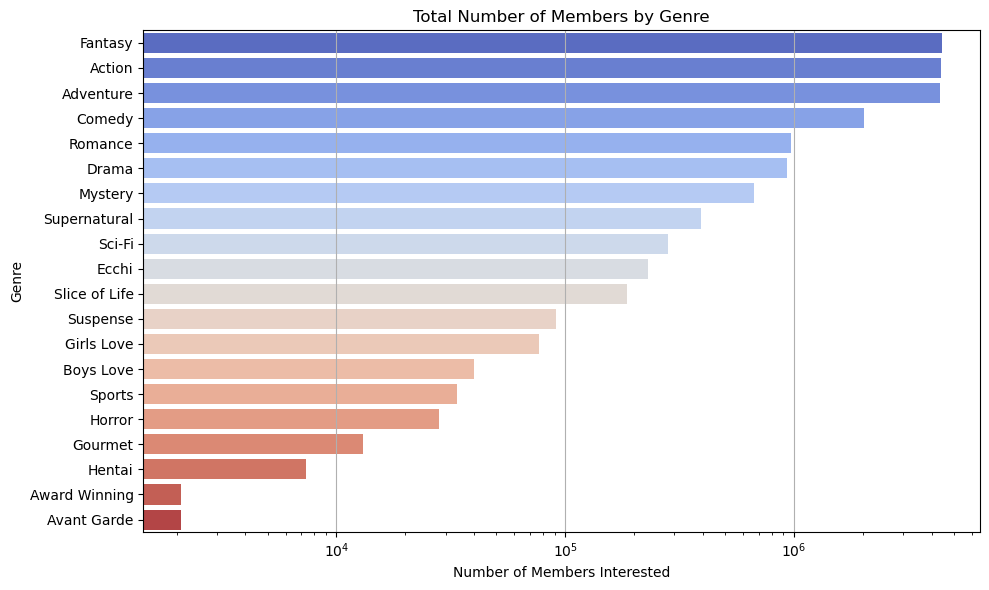

In [621]:
df_genres = df.assign(genres=df['Genres'].str.split(', ')).explode('Genres')

total_members_by_genre = df_genres.groupby('Genres')['Members'].sum().sort_values(ascending=False)

print("Total Number of Members by Genre:")
print(total_members_by_genre)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_members_by_genre.values, y=total_members_by_genre.index, palette='coolwarm')
plt.title('Total Number of Members by Genre')
plt.xlabel('Number of Members Interested')
plt.ylabel('Genre')
plt.xscale('log')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

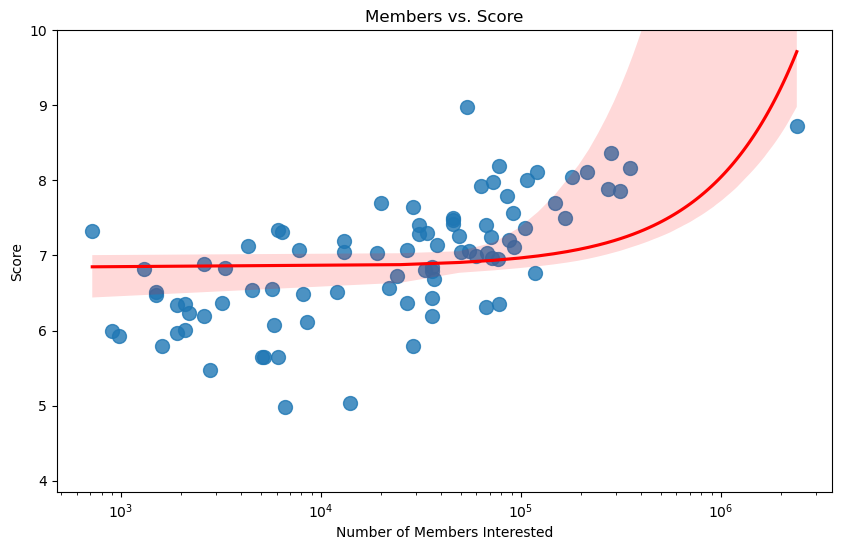

In [622]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Members', y='Score', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Members vs. Score')
plt.xlabel('Number of Members Interested')
plt.ylabel('Score')
plt.xscale('log')
plt.ylim(top=10)
plt.show()

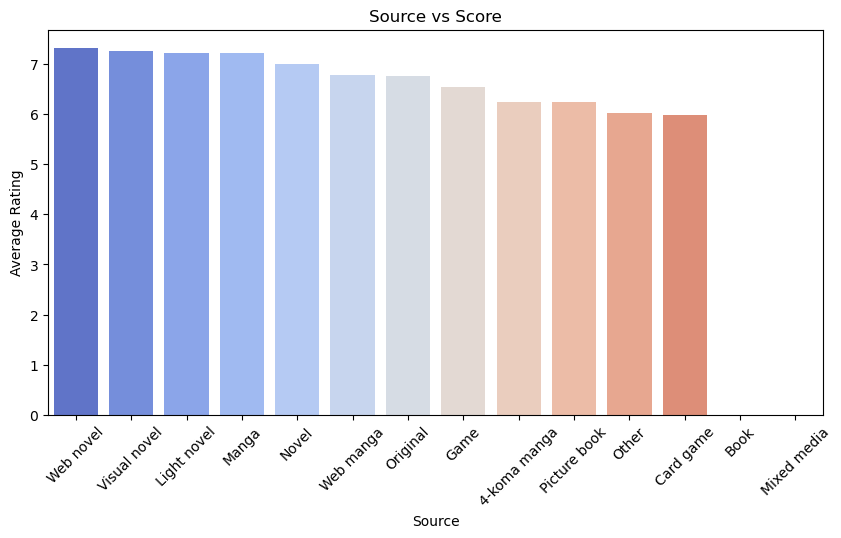

In [623]:
average_rating_by_source = df.groupby('Source')['Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=average_rating_by_source.index, y=average_rating_by_source.values, palette='coolwarm')
plt.title('Source vs Score')
plt.xlabel('Source')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Total No.of Members by source
Source
Manga           4757323
Light novel     1241000
Web manga        638596
Original         174627
Other            155490
Game             113816
Novel            100059
Visual novel      49769
4-koma manga      11700
Card game          8906
Picture book       5619
Web novel          2312
Mixed media        1600
Book                374
Name: Members, dtype: int64


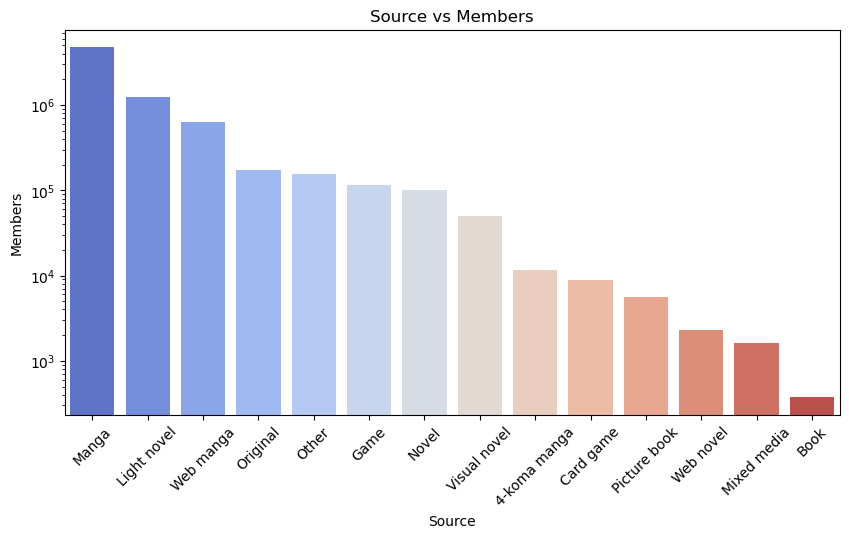

In [625]:
print('Total No.of Members by source')
print(df.groupby('Source')['Members'].sum().sort_values(ascending = False))
total_members_by_source = df.groupby('Source')['Members'].sum().sort_values(ascending = False)
plt.figure(figsize=(10, 5))
sns.barplot(x=total_members_by_source.index, y=total_members_by_source.values, palette='coolwarm')
plt.title('Source vs Members')
plt.xlabel('Source')
plt.ylabel('Members')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

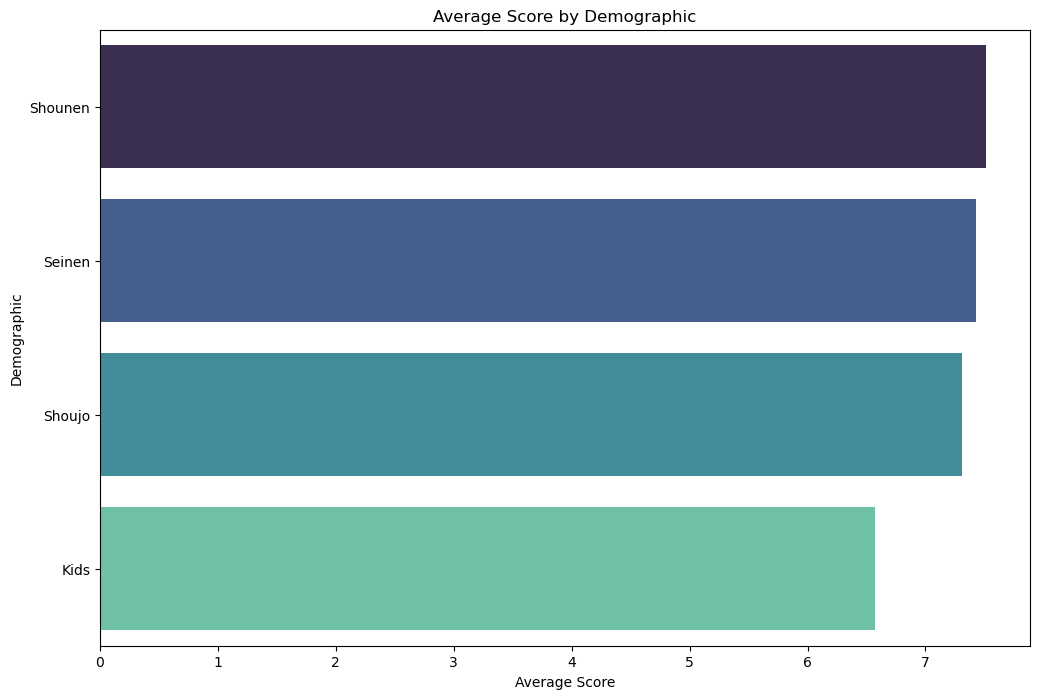

In [626]:
average_rating_by_demographic = df.groupby('Demographic')['Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=average_rating_by_demographic.index, x=average_rating_by_demographic.values, palette='mako')
plt.title('Average Score by Demographic')
plt.xlabel('Average Score')
plt.ylabel('Demographic')
plt.show()

Genre vs Demographic Count:
Demographic    Kids  Seinen  Shoujo  Shounen
Genres                                      
Action            8       0       0        9
Adventure         5       1       0        7
Award Winning     1       0       0        0
Comedy           18       5       1       11
Drama             0       1       1        1
Ecchi             0       1       0        2
Fantasy          10       0       0        7
Gourmet           1       0       0        0
Mystery           2       0       0        1
Romance           0       1       1        2
Sci-Fi            5       1       0        0
Slice of Life     0       0       0        1
Sports            1       0       0        2
Supernatural      1       1       0        0
Suspense          0       1       0        0


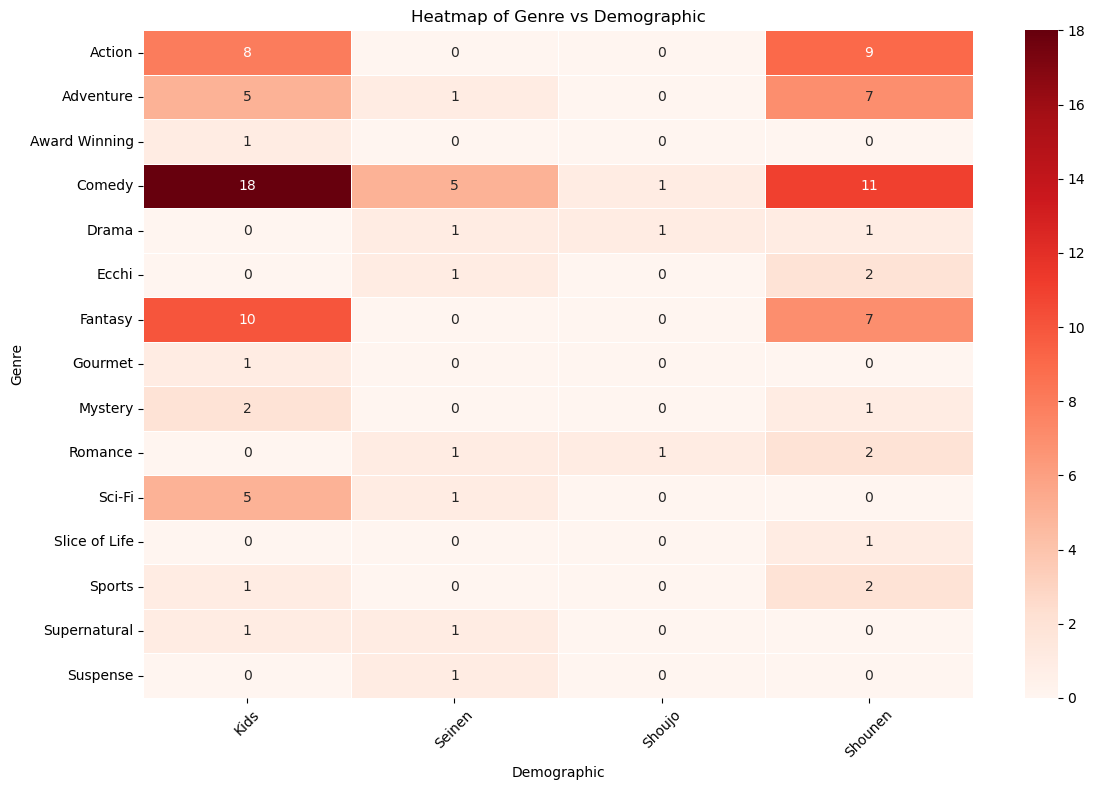

In [627]:
df_genres = df.assign(genres=df['Genres'].str.split(', ')).explode('Genres')
genre_demographic_count = df_genres.groupby(['Genres', 'Demographic']).size().unstack(fill_value=0)

print("Genre vs Demographic Count:")
print(genre_demographic_count)

plt.figure(figsize=(12, 8))
sns.heatmap(genre_demographic_count, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Genre vs Demographic')
plt.xlabel('Demographic')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Theme vs Demographic Count:
Demographic       Seinen  Shounen  Kids
Themes                                 
Adult Cast             1        1     0
Anthropomorphic        0        1     1
Gag Humor              0        1     1
Harem                  0        2     0
Historical             0        2     0
Isekai                 0        1     0
Mecha                  0        0     2
Music                  0        0     1
Mythology              0        1     0
Organized Crime        1        0     0
Otaku Culture          0        1     0
Racing                 0        0     1
Reincarnation          1        1     0
Romantic Subtext       0        1     0
Samurai                0        1     0
School                 0        5     1
Showbiz                1        0     0
Space                  0        0     1
Super Power            0        2     0
Workplace              0        1     0


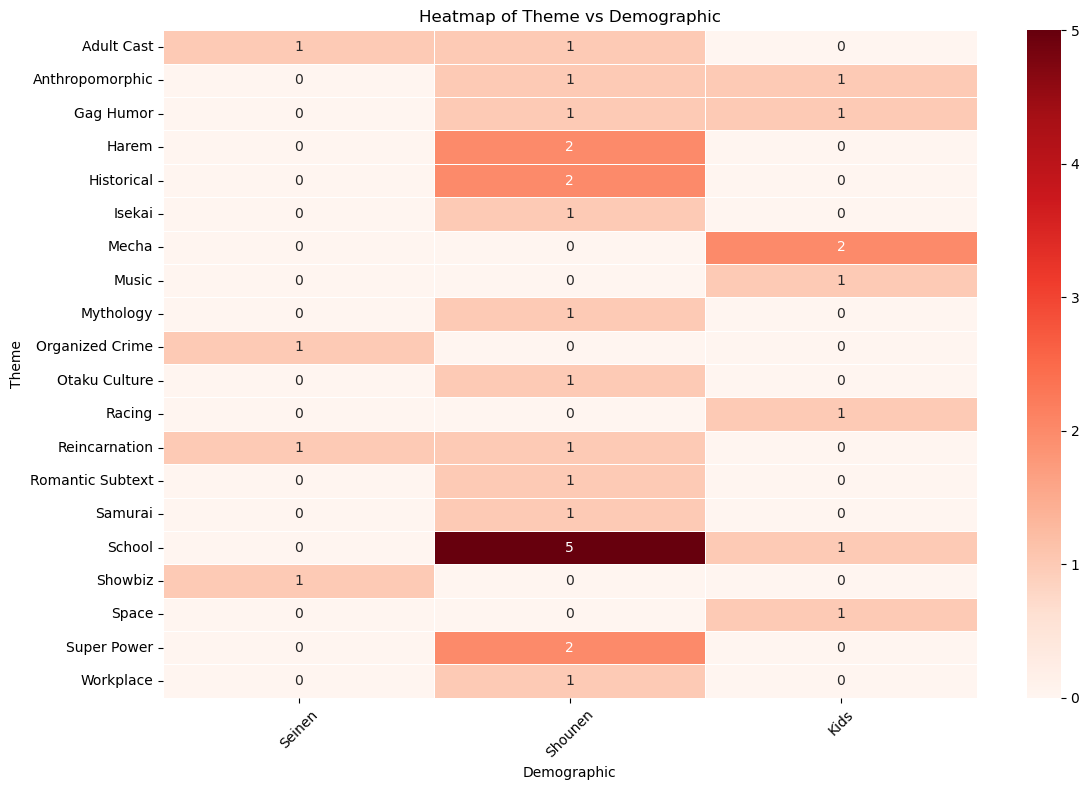

In [628]:
df_theme = df.assign(themes=df['Themes'].str.split(', ')).explode('Themes')

theme_demographic_count = df_theme.groupby(['Themes', 'Demographic']).size().unstack(fill_value=0)

print("Theme vs Demographic Count:")
print(theme_demographic_count)

plt.figure(figsize=(12, 8))
sns.heatmap(theme_demographic_count, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Theme vs Demographic')
plt.xlabel('Demographic')
plt.ylabel('Theme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total members for each Demomgraphic
Demographic
Shounen    4226200
Seinen      453141
Kids         97465
Shoujo       55400
Name: Members, dtype: int64


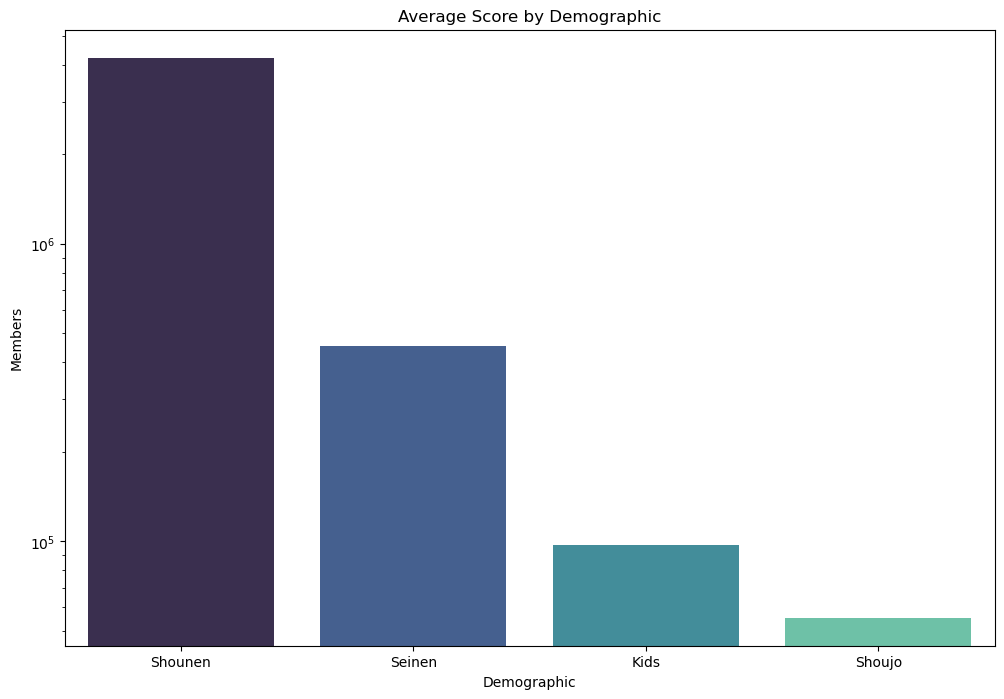

In [629]:
total_members_by_demographic = df.groupby('Demographic')['Members'].sum().sort_values(ascending=False)
print('Total members for each Demomgraphic')
print(total_members_by_demographic)
plt.figure(figsize=(12, 8))
sns.barplot(x=total_members_by_demographic.index, y=total_members_by_demographic.values, palette='mako')
plt.title('Average Score by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Members')
plt.yscale('log')
plt.show()

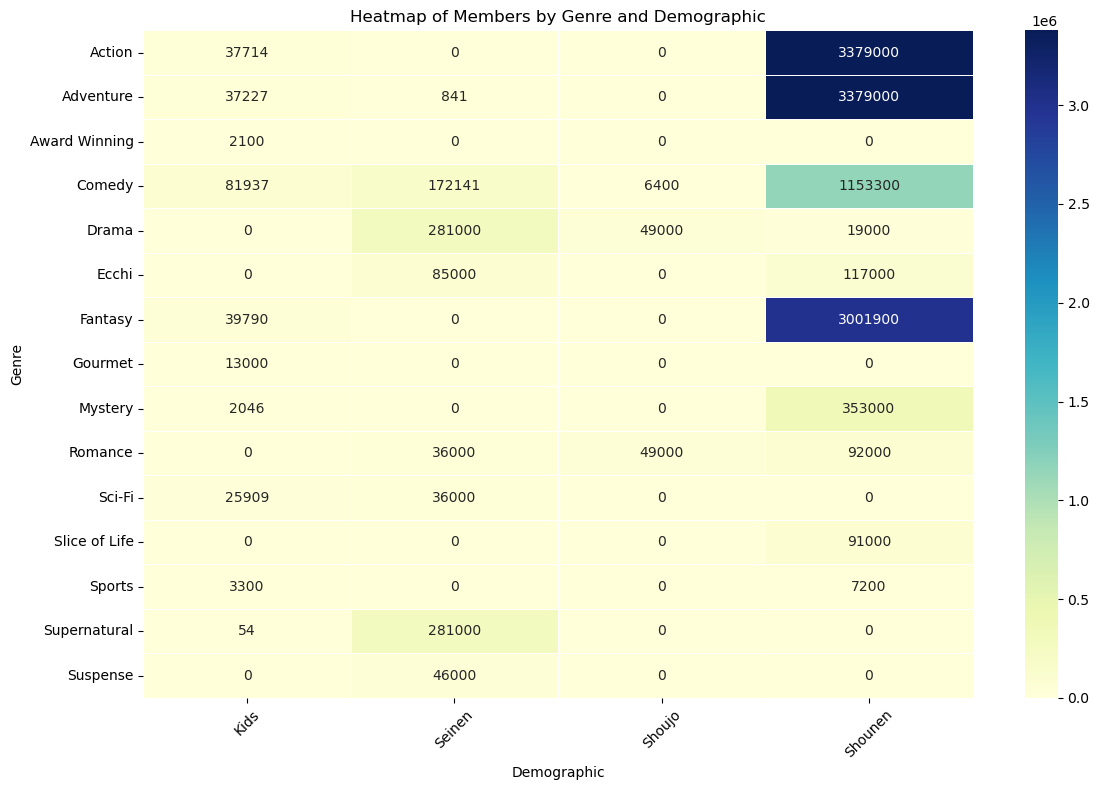

In [630]:
df_genres = df.assign(genres=df['Genres'].str.split(', ')).explode('Genres')

genre_demographic_members = df_genres.groupby(['Genres', 'Demographic'])['Members'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(genre_demographic_members, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Members by Genre and Demographic')
plt.xlabel('Demographic')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

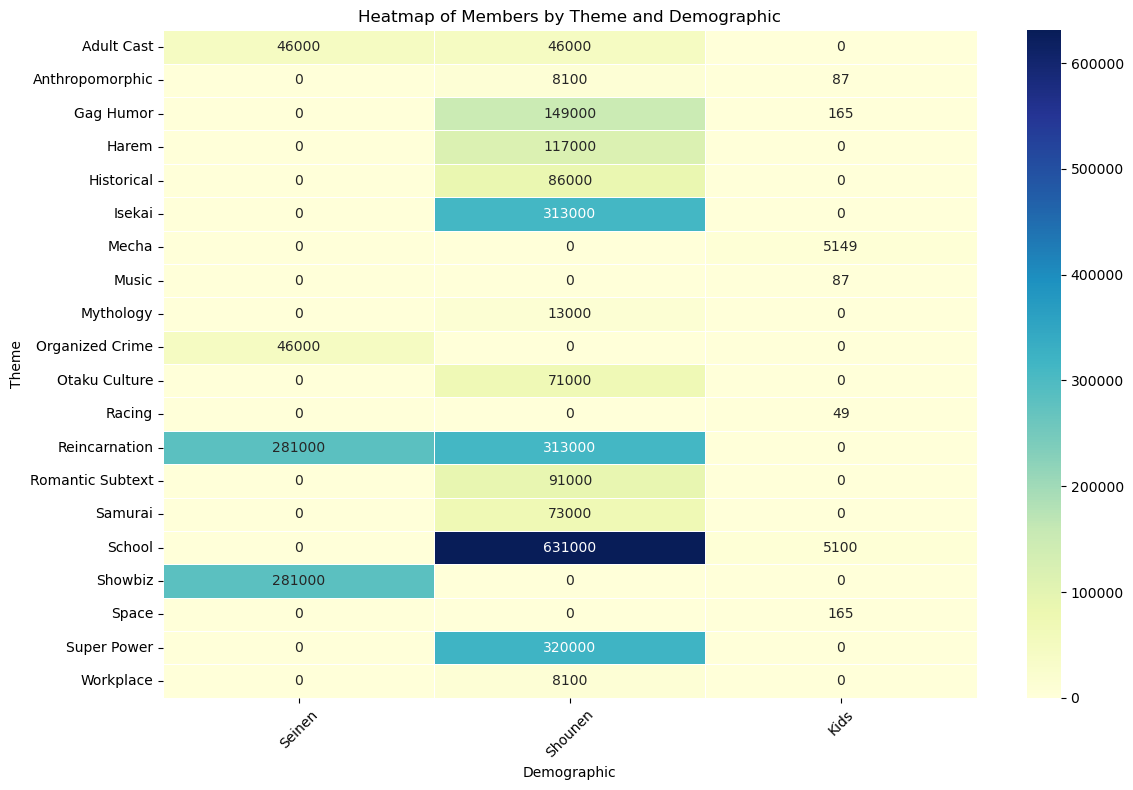

In [631]:
df_themes = df.assign(themes=df['Themes'].str.split(', ')).explode('Themes')

theme_demographic_members = df_themes.groupby(['Themes', 'Demographic'])['Members'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(theme_demographic_members, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Members by Theme and Demographic')
plt.xlabel('Demographic')
plt.ylabel('Theme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

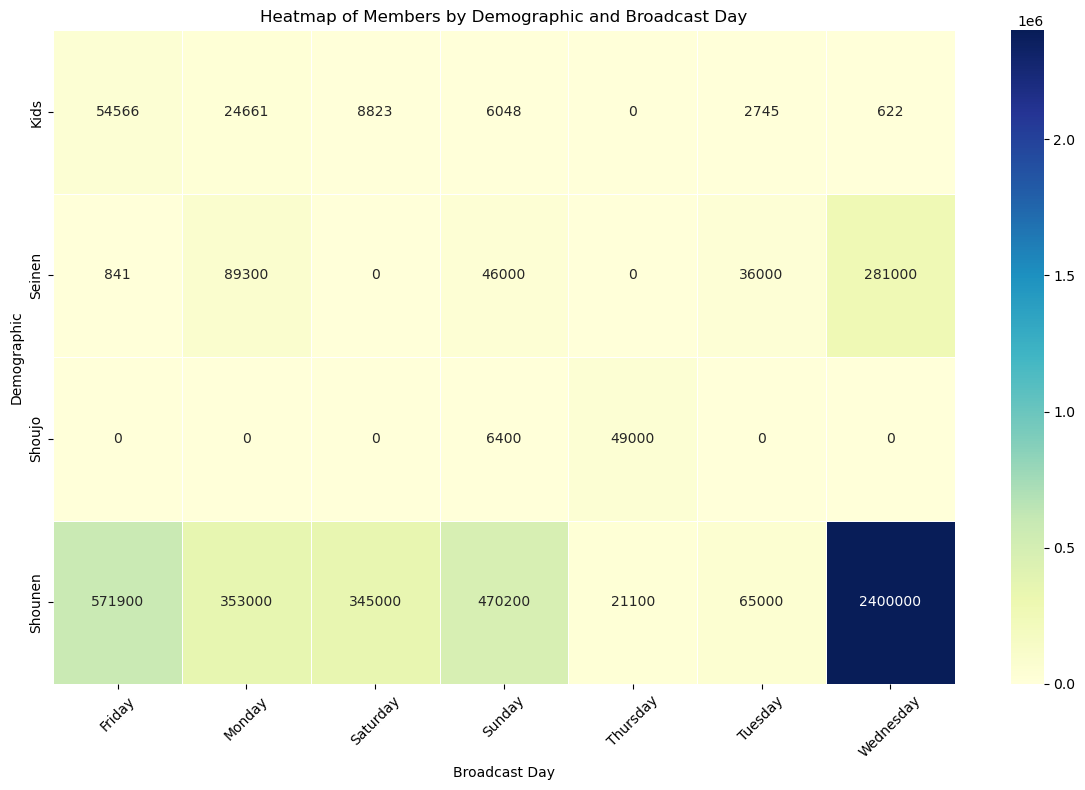

In [632]:
demographic_day_members = df.groupby(['Demographic', 'Broadcast Day'])['Members'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(demographic_day_members, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Members by Demographic and Broadcast Day')
plt.xlabel('Broadcast Day')
plt.ylabel('Demographic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

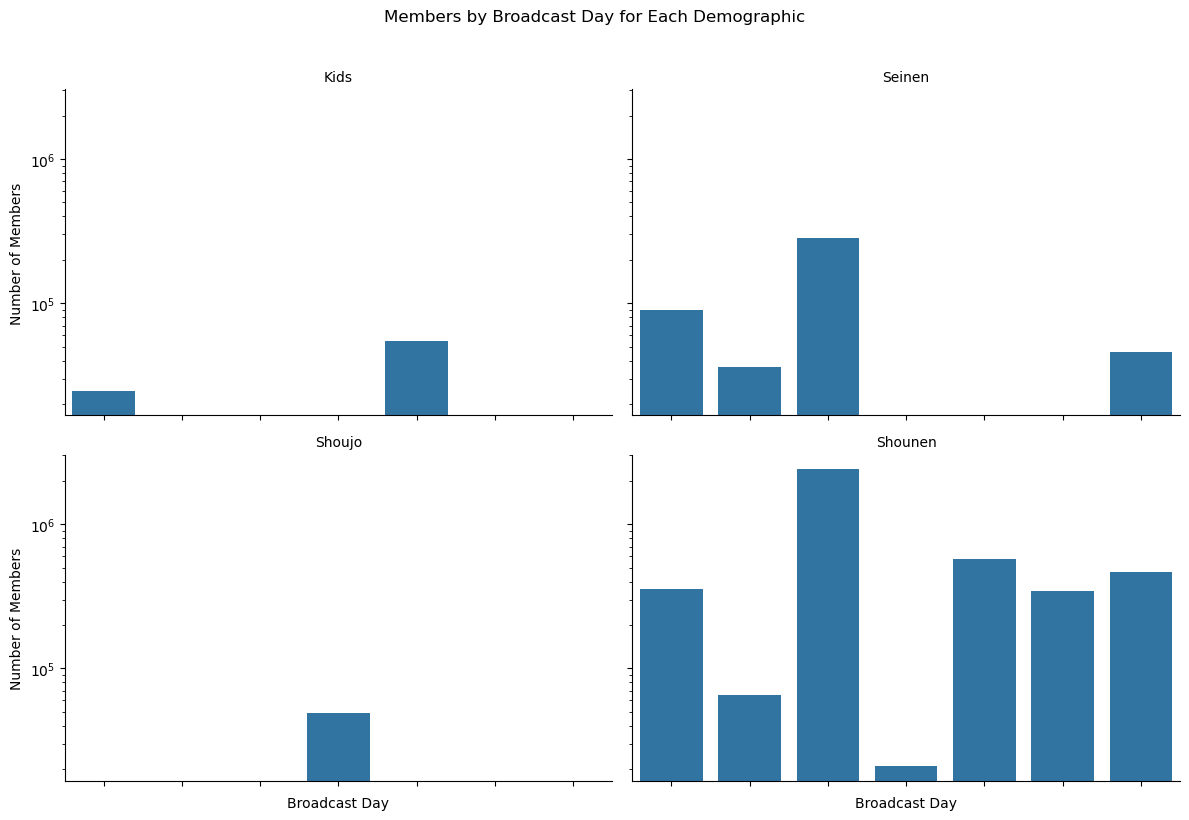

In [633]:
# Plot facet grid
df_grouped = df.groupby(['Demographic', 'Broadcast Day'])['Members'].sum().reset_index()

df_grouped_pivot = df_grouped.pivot(index='Broadcast Day', columns='Demographic', values='Members').fillna(0)
g = sns.FacetGrid(df_grouped, col='Demographic', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='Broadcast Day', y='Members', order=day_mapping.values())
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Broadcast Day', 'Number of Members')
g.set_xticklabels(rotation=45)
g.fig.suptitle('Members by Broadcast Day for Each Demographic', y=1.02)
plt.yscale('log')
plt.tight_layout()
plt.show()

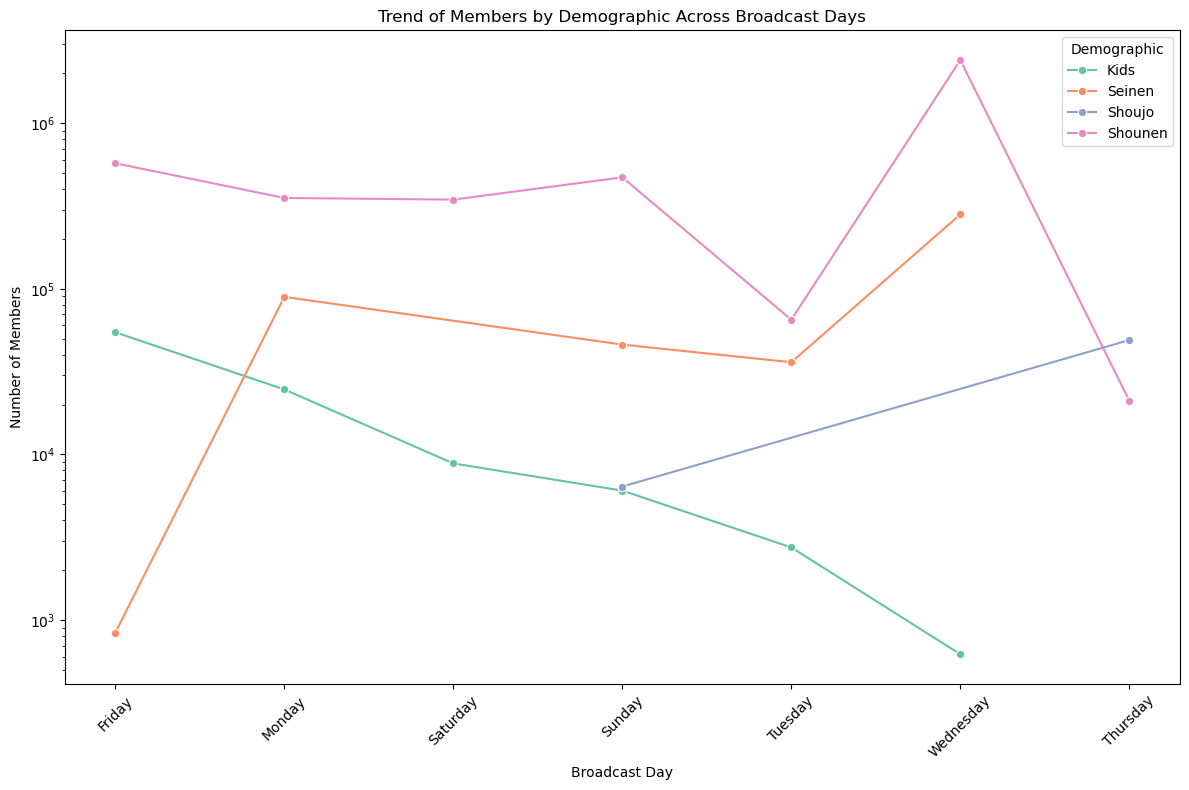

In [634]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_grouped, x='Broadcast Day', y='Members', hue='Demographic', marker='o', palette='Set2')
plt.title('Trend of Members by Demographic Across Broadcast Days')
plt.xlabel('Broadcast Day')
plt.ylabel('Number of Members')
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Demographic')
plt.tight_layout()
plt.show()


In [636]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Synopsis'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,000,100,1000,100th,11,1948,1979,1a,2005,20th,...,yuuhi,yuuta,zegapain,zenitendo,zeref,zero,zhuan,zhui,zoo,zui
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194476,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.142022,0.0
4,0.0,0.23131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.077103,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
178,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
179,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.324763,0.0,0.0,0.000000,0.0
180,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [637]:
unrelevent_words = ['mal','source','synopsis','written']
tfidf_df = tfidf_df.drop(columns = unrelevent_words,axis = 1)

In [638]:
keyword_freq = tfidf_df.sum().sort_values(ascending=False)
print(keyword_freq.head(10))

season    5.315935
second    4.438753
world     3.655797
life      2.454718
school    2.259896
love      2.173587
sequel    1.926984
movie     1.888823
anime     1.871440
day       1.869572
dtype: float64


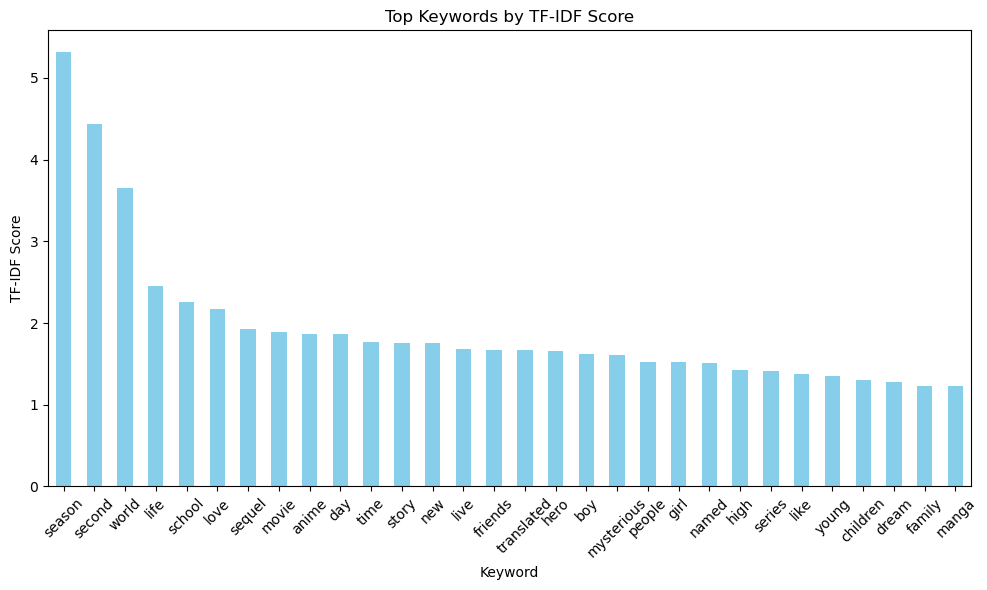

In [639]:
# Sum up the TF-IDF scores for each keyword across all synopses
sum_tfidf = tfidf_df.sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 6))
sum_tfidf.plot(kind='bar', color='skyblue')
plt.title('Top Keywords by TF-IDF Score')
plt.xlabel('Keyword')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [640]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['Sentiment'] = df['Synopsis'].apply(get_sentiment)
df[['Title', 'Synopsis', 'Sentiment']].head(20)

,Title,Synopsis,Sentiment
0,"""Oshi no Ko"" 2nd Season",Aqua's desire for revenge takes center stage a...,0.062500
1,Tokidoki Bosotto Russia-go de Dereru Tonari no...,"Smart, refined, and strikingly gorgeous, half-...",0.108021
2,Kami no Tou: Ouji no Kikan,Ja Wangnan can’t seem to pass the 20th floor. ...,0.109091
3,Shikanoko Nokonoko Koshitantan,No one knows Torako used to be a delinquent. A...,0.123214
4,Fairy Tail: 100-nen Quest,The 100 Years Quest: a mission so challenging ...,0.178306
5,Isekai Suicide Squad,"Amanda Waller, the head of A.R.G.U.S., has ass...",0.156250
6,Tsue to Tsurugi no Wistoria,Will Serfort dreams of keeping his promise to ...,0.170000
7,Gimai Seikatsu,Yuuta Asamura gets a new stepsister after his ...,0.064470
8,Isekai Shikkaku,An adventure in another world with cute girls ...,0.083929
9,Giji Harem,"Eiji Kitahama, a second year high school stude...",0.156364


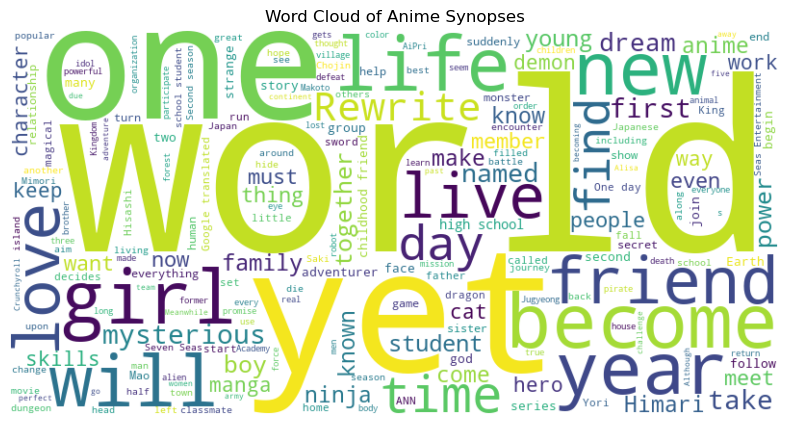

In [641]:
from wordcloud import WordCloud, STOPWORDS

all_synopsis = " ".join(df['Synopsis'])
custom_stopwords = set(['source', 'synopsis', 'mal','written'])
combined_stopwords = STOPWORDS.union(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=combined_stopwords).generate(all_synopsis)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Synopses')
plt.show()

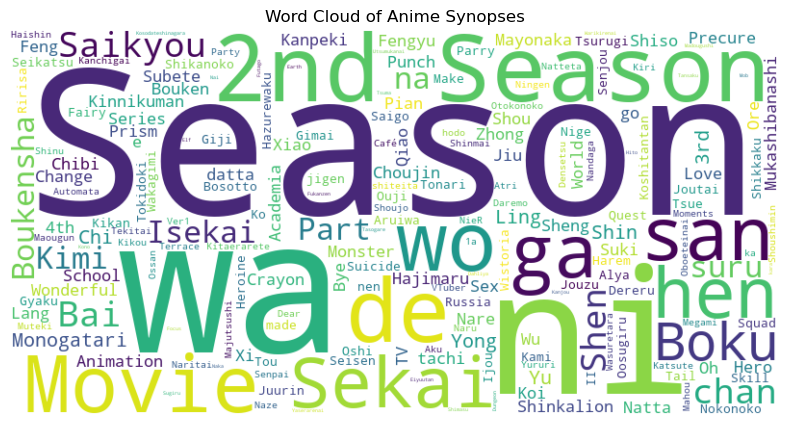

In [642]:
all_titles = " ".join(df['Title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Synopses')
plt.show()

In [643]:
# Calculate average members for each title word count
df['title_word_count'] = df['Title'].apply(lambda x: len(x.split()))
word_count_members = df.groupby('title_word_count')['Members'].mean().reset_index()

print(word_count_members)


    title_word_count       Members
0                  1   3749.666667
1                  2  96842.857143
2                  3  15392.153846
3                  4  18257.000000
4                  5  36676.789474
5                  6  37404.500000
6                  7  52452.375000
7                  8  60745.250000
8                  9  26033.500000
9                 10    950.333333
10                12  30236.500000
11                14  72000.000000
12                15  68000.000000
13                16  78000.000000


In [644]:
source_word_count = df.groupby('Source')['title_word_count'].mean().reset_index()

print(source_word_count)

          Source  title_word_count
0   4-koma manga          2.000000
1           Book          5.500000
2      Card game          2.666667
3           Game          3.000000
4    Light novel          7.647059
5          Manga          4.304348
6    Mixed media          5.000000
7          Novel          4.000000
8       Original          3.725490
9          Other          5.181818
10  Picture book          2.666667
11  Visual novel          5.500000
12     Web manga          3.277778
13     Web novel          4.750000


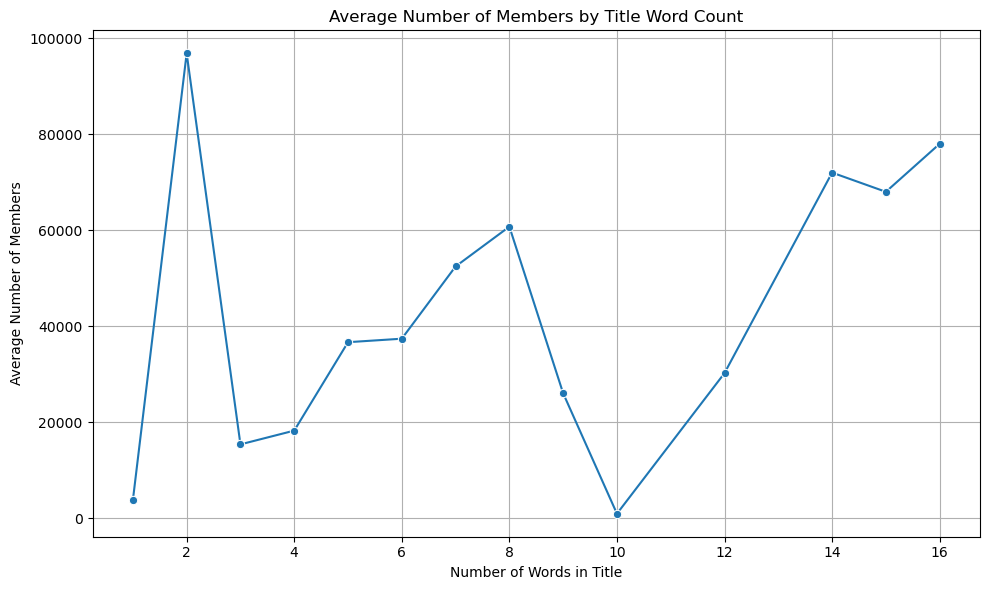

In [645]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=word_count_members, x='title_word_count', y='Members', marker='o')
plt.title('Average Number of Members by Title Word Count')
plt.xlabel('Number of Words in Title')
plt.ylabel('Average Number of Members')
plt.grid(True)
plt.tight_layout()
plt.show()

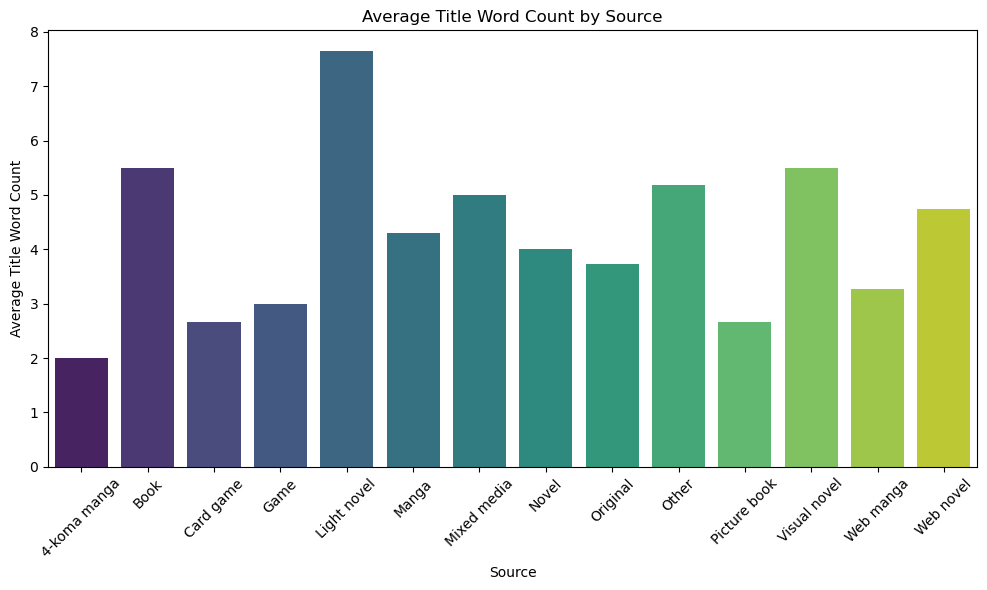

In [646]:
source_word_count = df.groupby('Source')['title_word_count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=source_word_count, x='Source', y='title_word_count', palette='viridis')
plt.title('Average Title Word Count by Source')
plt.xlabel('Source')
plt.ylabel('Average Title Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [657]:
from sklearn.metrics.pairwise import cosine_similarity


input_title = 'Shikanoko Nokonoko Koshitantan'

custom_stopwords = ['source', 'synopsis', 'mal','written']

tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Synopsis'])

input_index = df[df['Title'] == input_title].index[0]
cosine_similarities = cosine_similarity(tfidf_matrix[input_index], tfidf_matrix).flatten()
similar_indices = cosine_similarities.argsort()[-6:][::-1][1:]
recommended_anime = df.iloc[similar_indices]

print("Recommendations based on synopsis for:", input_title)
for title in recommended_anime['Title']:
    print(title)


Recommendations based on synopsis for: Shikanoko Nokonoko Koshitantan
Elf-san wa Yaserarenai.
Yeosin Gangnim
VTuber Nandaga Haishin Kiri Wasuretara Densetsu ni Natteta
Wuliao Jiu Wanjie
Bye Bye, Earth
